In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Paths
dataset_dir = '/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/'  # Root folder with class-wise folders
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,         # 80/20 split
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# # Load MobileNetV2 base
# base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
# base_model.trainable = False  # Freeze base

from tensorflow.keras.applications import Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Build model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

# Train
history = model.fit(
    train_gen,
    epochs=50,
    validation_data=val_gen,
    callbacks=callbacks
)


2025-07-28 03:41:07.723632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753674067.929187      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753674067.988949      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 800 images belonging to 10 classes.
Found 199 images belonging to 10 classes.


I0000 00:00:1753674082.290566      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1753674120.527149     111 service.cc:148] XLA service 0x7a681447da80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753674120.528067     111 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1753674123.731421     111 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1753674133.988314     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1753674134.187847     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1753674135.242058     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1753674135.4305

25/25 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.2870 - loss: 1.9387 - val_accuracy: 0.1960 - val_loss: 7.2895 - learning_rate: 0.0010
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 588ms/step - accuracy: 0.6095 - loss: 1.1655 - val_accuracy: 0.1910 - val_loss: 3.8710 - learning_rate: 0.0010
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 558ms/step - accuracy: 0.7053 - loss: 0.8882 - val_accuracy: 0.3618 - val_loss: 2.7679 - learning_rate: 0.0010
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 532ms/step - accuracy: 0.7588 - loss: 0.7238 - val_accuracy: 0.3719 - val_loss: 3.8560 - learning_rate: 0.0010
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 524ms/step - accuracy: 0.7651 - loss: 0.6617 - val_accuracy: 0.2010 - val_loss: 20.3241 - learning_rate: 0.0010
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 547ms/step - accuracy: 0.8069 - loss: 0.6196 - val_accuracy: 0.4322 - val_loss: 3.7852 - learning_rate: 2.0000e-04
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 583ms/step - accuracy: 0.8669 - loss: 0.3770 - va

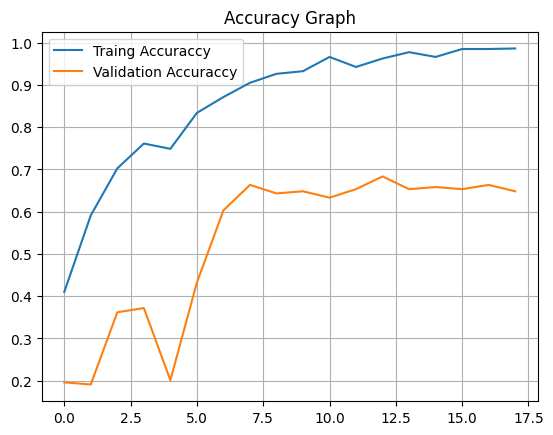

In [5]:
# Import the pyplot module from matplotlib
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],label="Traing Accuraccy")
plt.plot(history.history["val_accuracy"],label="Validation Accuraccy")
plt.title("Accuracy Graph")
plt.legend()
plt.grid()
plt.show()

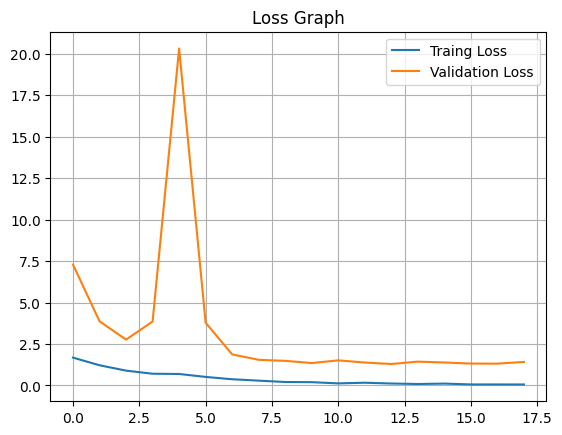

In [6]:
plt.plot(history.history["loss"],label="Traing Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.title("Loss Graph")
plt.legend()
plt.grid()
plt.show()